In [1]:
import matplotlib.pyplot as plt
from skimage import data, img_as_float
from skimage.segmentation import chan_vese
import os
import cv2
import numpy as np

def seg(image):
    # Feel free to play around with the parameters to see how they impact the result
    cv = chan_vese(image, mu=0.05, lambda1=1, lambda2=1, tol=1e-3, max_num_iter=200,
                dt=0.5, init_level_set="checkerboard", extended_output=True)

    fig, axes = plt.subplots(2, 2, figsize=(8, 8))
    ax = axes.flatten()

    ax[0].imshow(image, cmap="gray")
    ax[0].set_axis_off()
    ax[0].set_title("Original Image", fontsize=12)

    ax[1].imshow(cv[0], cmap="gray")
    ax[1].set_axis_off()
    title = "Chan-Vese segmentation - {} iterations".format(len(cv[2]))
    ax[1].set_title(title, fontsize=12)

    ax[2].imshow(cv[1], cmap="gray")
    ax[2].set_axis_off()
    ax[2].set_title("Final Level Set", fontsize=12)

    ax[3].plot(cv[2])
    ax[3].set_title("Evolution of energy over iterations", fontsize=12)

    fig.tight_layout()
    plt.show()
    return cv[0]

def show_seg(data_dir='/Data4/student_zhihan_data/data/GC10-DET', split='test'):
    for file in os.listdir(os.path.join(data_dir, split, 'images')):
        prelix = file[:-4]
        image_path = os.path.join(data_dir, split, "images", file)
        label_path = os.path.join(data_dir, split, "labels", prelix+".txt")

        image = cv2.imread(image_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        labels = np.loadtxt(label_path)

        image_width, image_height = image.shape

        if len(labels.shape) == 2:
            for label in labels:  
                label = label[1:]     
                x, y, width, height = label[0], label[1], label[2], label[3]
                target = image[max(0, int((y - height / 2) * image_width)) : min(image_height, int((y + height / 2) * image_width)), max(0, int((x - width / 2) * image_height)) : min(image_width, int((x + width / 2) * image_height))]
                seg(target)
        else:
            label = labels[1:]     
            x, y, width, height = label[0], label[1], label[2], label[3]
            target = image[max(0, int((y - height / 2) * image_width)) : min(image_height, int((y + height / 2) * image_width)), max(0, int((x - width / 2) * image_height)) : min(image_width, int((x + width / 2) * image_height))]
            seg(target)

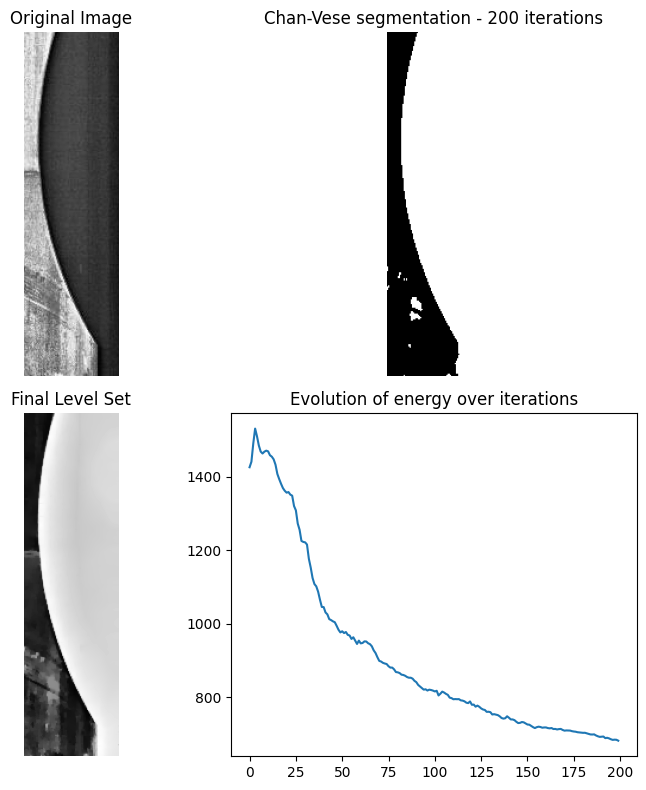

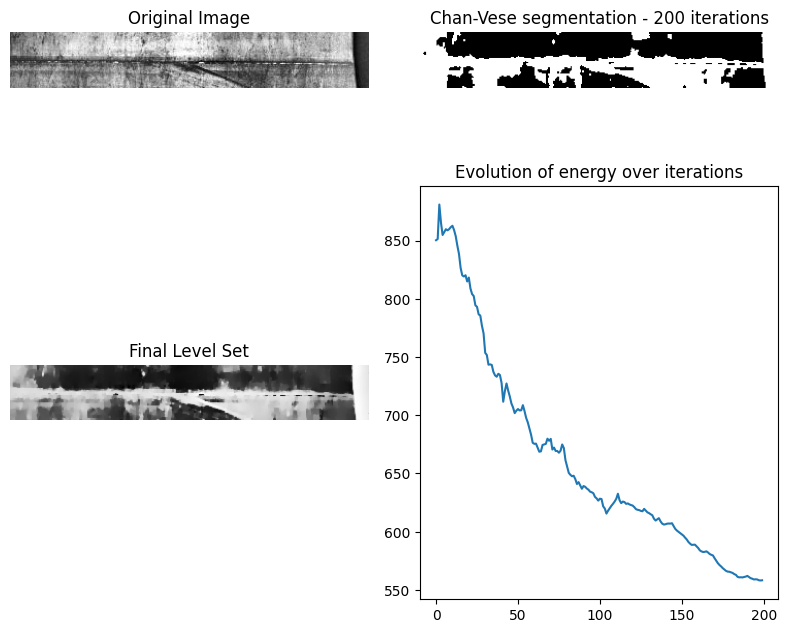

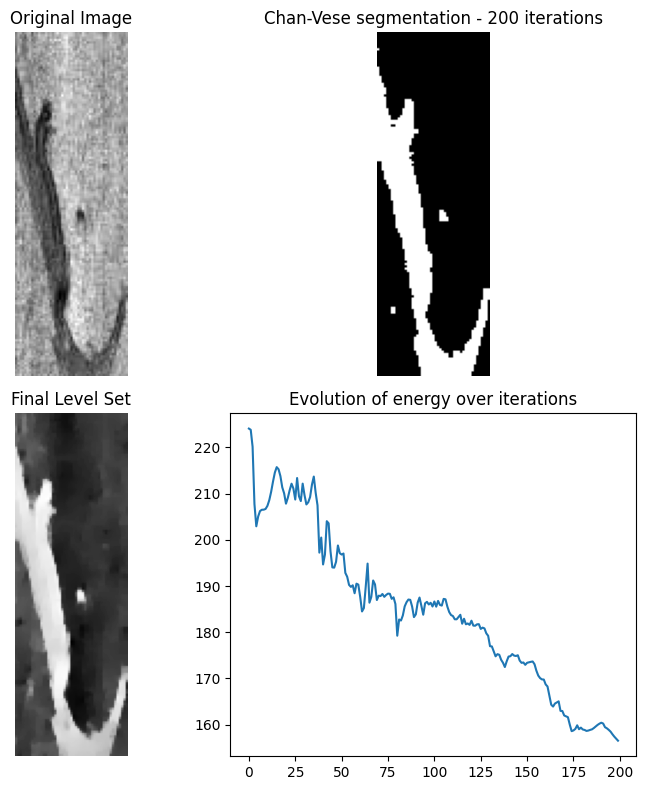

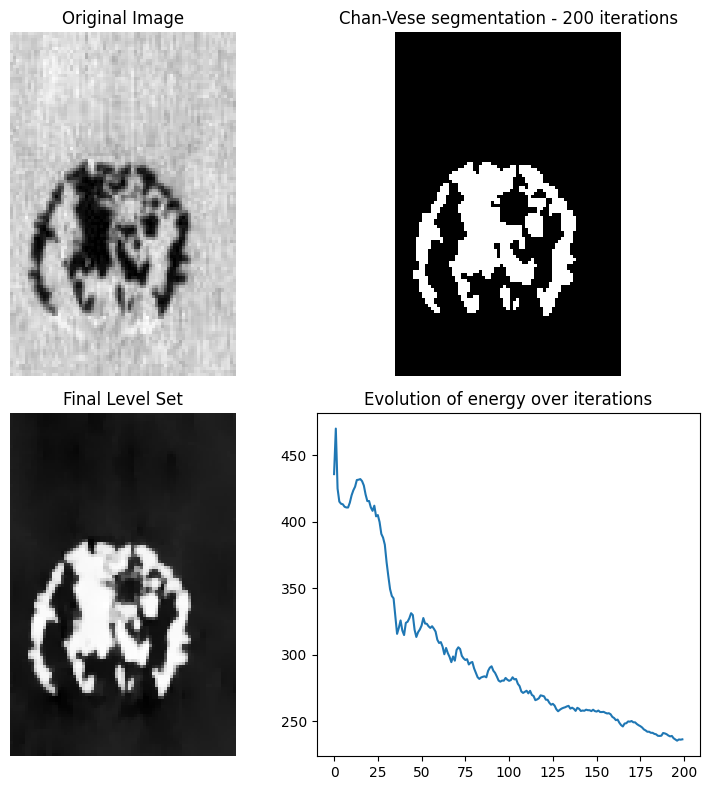

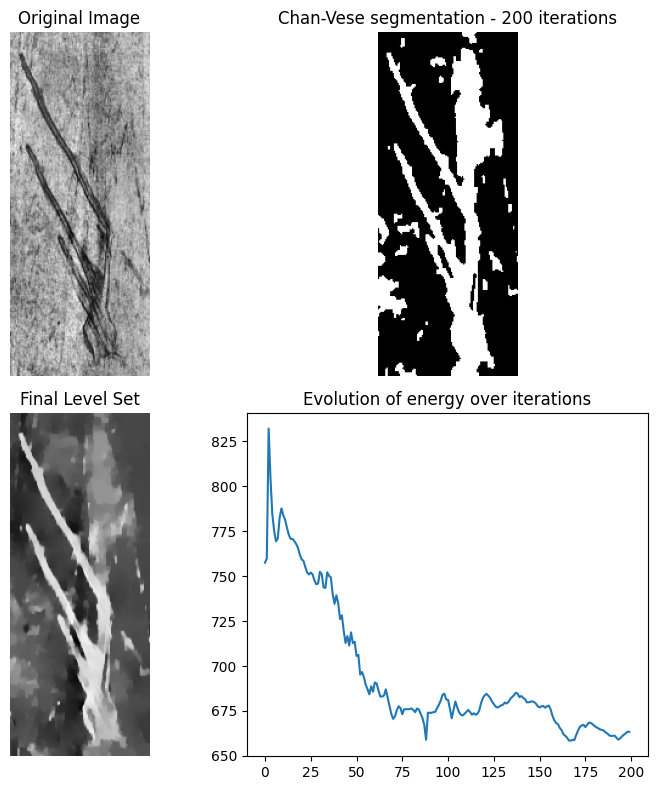

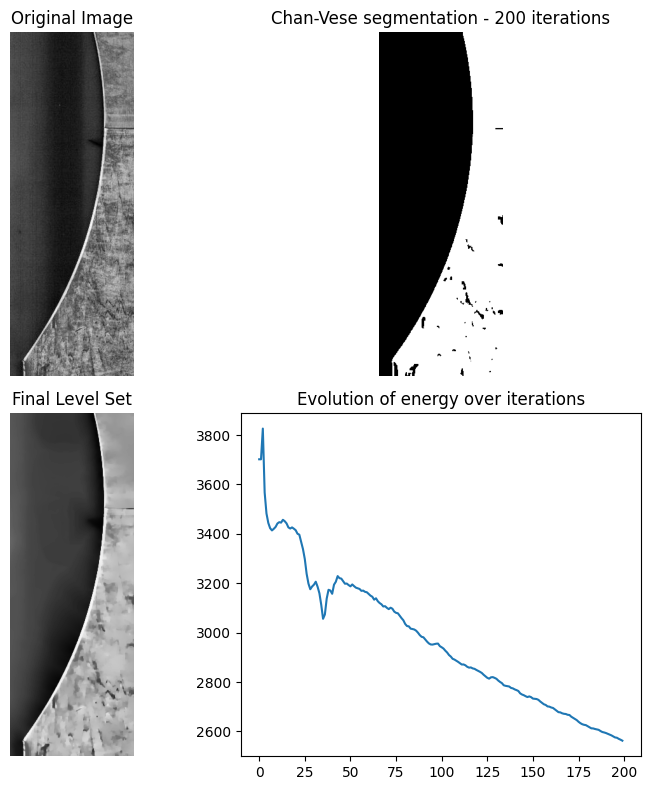

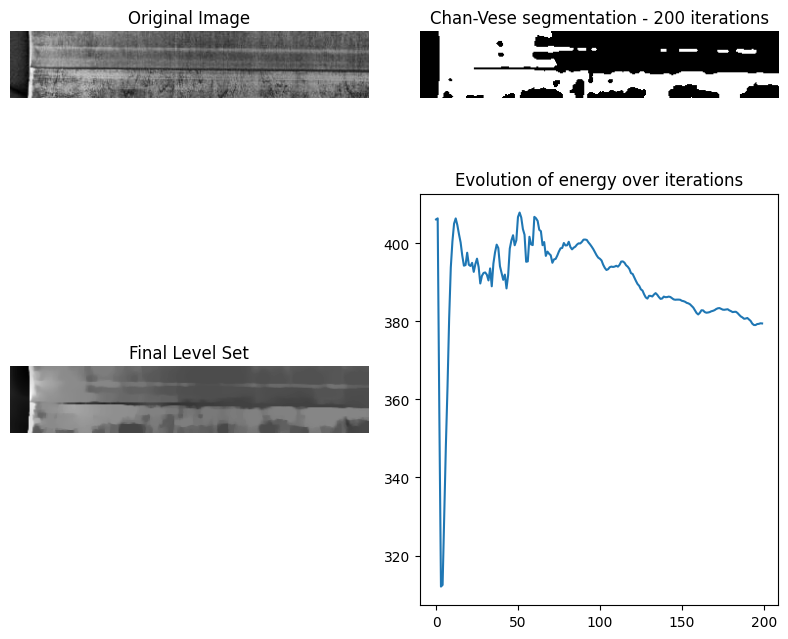

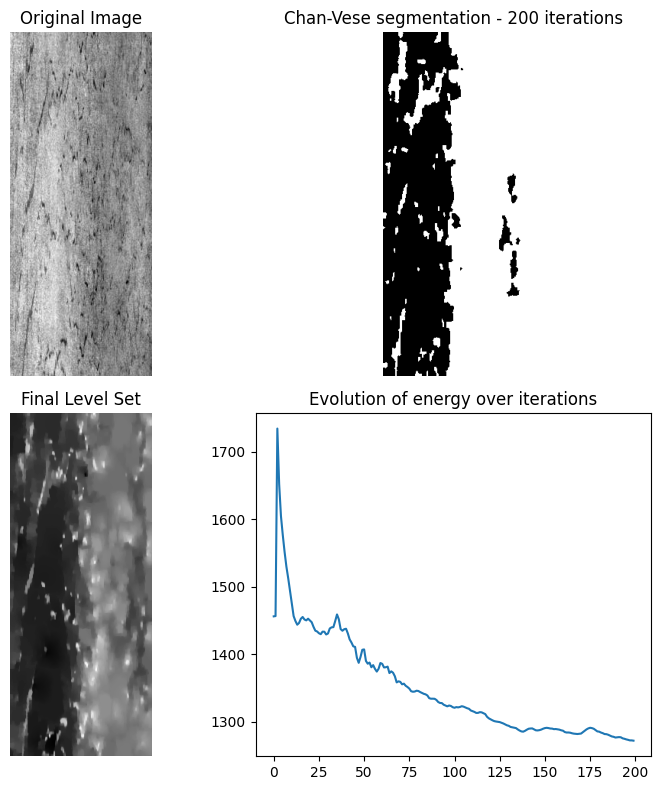

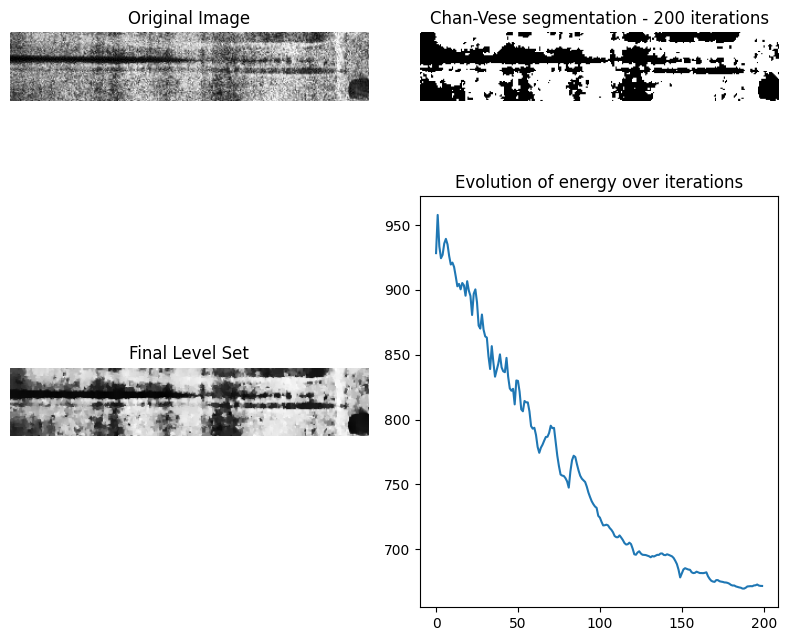

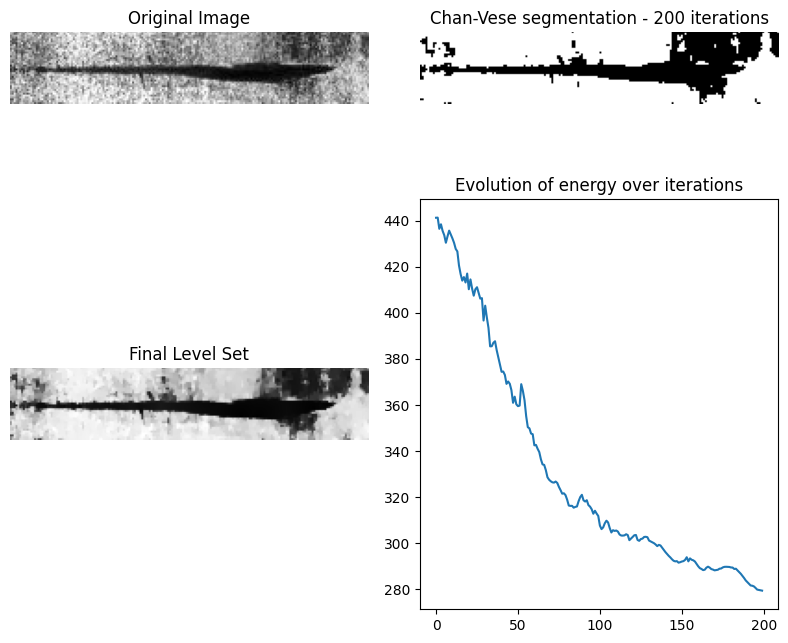

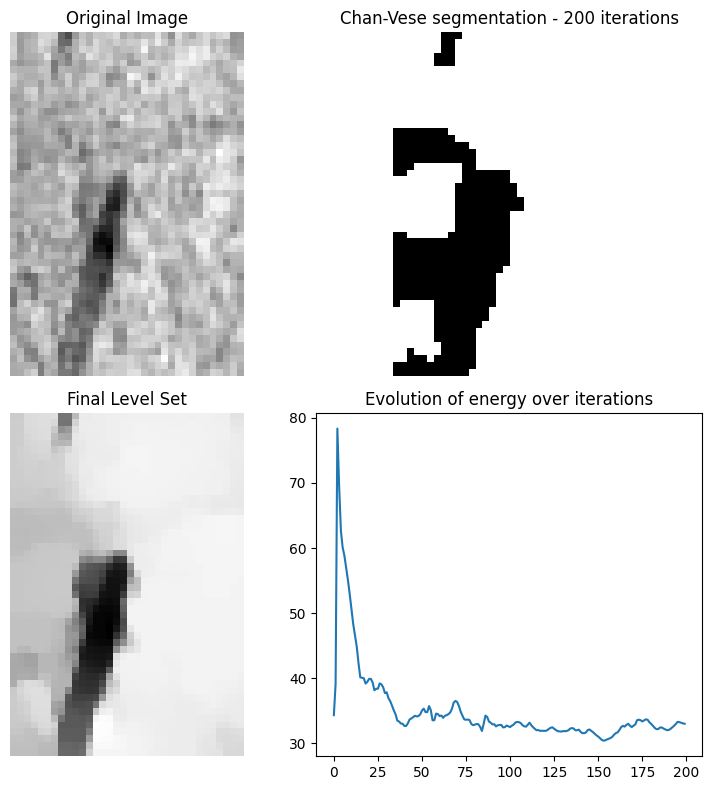

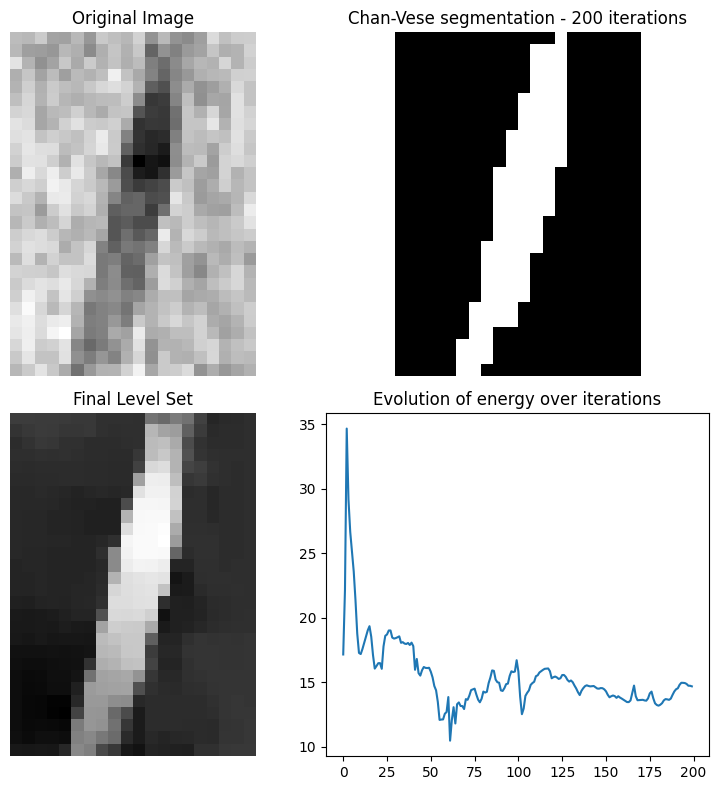

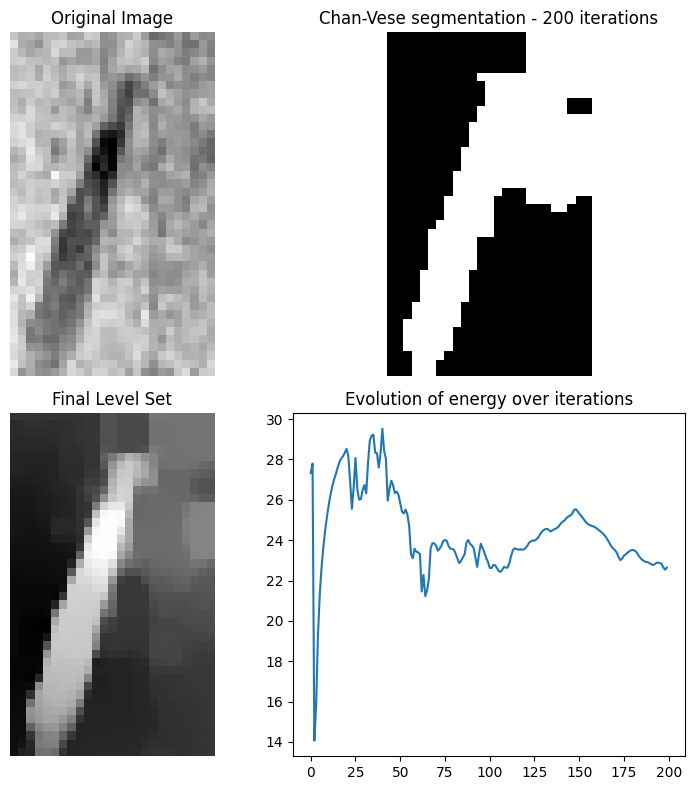

KeyboardInterrupt: 

In [2]:
show_seg()